Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE".

Do not edit or insert code into the test cells as all you insert will be overwritten by the automated testing code.

---

**Question 1**: Fit the Higgs mass - given a `fitter(xvalues, data, init)` function below, write a function `fitfunc(...)` that describes the combined background and signal model to fit the data. Create two pictures: 

**(a)** plot the data with cross markers ('+' symbol) and the best fit curve as red line on the first plot and 

**(b)** draw the residual ratios with cross markers on the second plot where the residual ratio is defined as the difference between data and fitted model, divided by data for every data point.

The fit function is composed of a background model with 3 parameters $$b(m)=A\,\exp{}\left( b_{1}\,(m - 105.5)+b_{2}\,(m-105.5)^{2}\right).$$ The signal is added to the background and its model is $$s(m) = \frac{R}{\sigma\sqrt{2\,\pi}}\,\exp{}\left(-\frac{(m-\mu{})^{2}}{2\sigma^{2}}\right),$$ featuring another 3 parameters for a total of six parameters to fit.

A set of 6 initial values for the fit are given. You could draw the data and the initial values, inserted into your function, on the same plot and convince yourself that these are close to the best in order to check your function.

The xvalues represent masses (in GeV units) of potential particles decaying into two photons in the ATLAS detector at CERN. Any peak would correspond to a real particle having decayed while a smooth background represents chance coincidences or simply noise. The peak to fit at a bit above 125 GeV led to the announcement of the discovery of the Higgs particle at CERN in 2012. The residuals plot subtracts the background model and let's the signal stand out very clearly. The data itself is read off a histogram (in counts) hence the xvalues really are bin centres at the mass values as indicated.

[ 1.25940359e+02  1.52653359e+00  6.77059883e+02  4.66071204e+03
 -4.27904773e-02  1.74761813e-04]


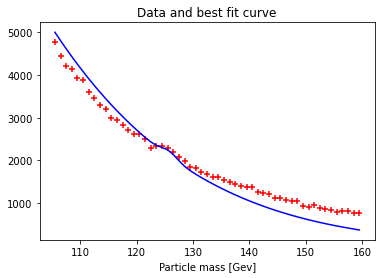

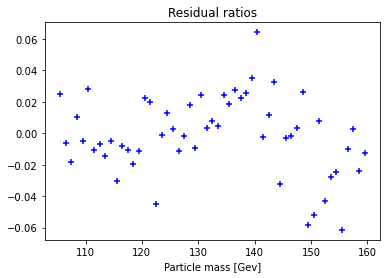

In [19]:
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Given
def fitfunc(m,mu,sig,R,A,b1,b2):
    bm = A * np.exp(b1 * (m - 105.5) + b2 * (m - 105.5)**2)
    sm = R * np.exp((-(m - mu)**2) / (2 * sig**2)) / (sig*(2*math.pi)**0.5)
    return bm + sm
def fitter(xval, yval, initial):
    ''' function to fit the given data using a 'fitfunc' TBD. 
        The curve_fit function is called. Only the best fit values 
        are returned to be utilized in a main script.
    '''
    best, _ = curve_fit(fitfunc, xval, yval, p0=initial)
    return best

# Use functions with script below for plotting parts (a) and (b)
# start value parameter definitions, see equations for s(m) and b(m).
# init[0] = mu
# init[1] = sigma
# init[2] = R
# init[3] = A
# init[4] = b1
# init[5] = b2
init = (125.8, 1.4, 470.0, 5000.0, -0.04, -1.5e-4)
xvalues = np.arange(start=105.5, stop=160.5, step=1)
data = np.array([4780, 4440, 4205, 4150, 3920, 3890, 3590, 3460, 3300, 3200, 3000, 
                 2950, 2830, 2700, 2620, 2610, 2510, 2280, 2330, 2345, 2300, 2190, 
                 2080, 1990, 1840, 1830, 1730, 1680, 1620, 1600, 1540, 1505, 1450, 
                 1410, 1380, 1380, 1250, 1230, 1220, 1110, 1110, 1080, 1055, 1050, 
                 940, 920, 950, 880, 870, 850, 800, 820, 810, 770, 760])
fit = fitter(xvalues, data, init)
print(fit)
resid_rat = (data-fitfunc(xvalues, fit[0],fit[1],fit[2],fit[3],fit[4],fit[5]))/data

fig, ax1 = plt.subplots()
fig, ax2 = plt.subplots()
ax1.scatter(xvalues, data, color='r', marker='+')
ax1.plot(xvalues, fitfunc(xvalues, init[0],init[1],init[2],init[3],init[4],init[5]),color='b')
ax1.set_title("Data and best fit curve")
ax1.set_xlabel("Particle mass [Gev]")

ax2.scatter(xvalues,resid_rat, color='b', marker='+')
ax2.set_title("Residual ratios")
ax2.set_xlabel("Particle mass [Gev]")

plt.show()

In [ ]:
# Test cell
val = fitfunc(xvalues, init[0], init[1], init[2], init[3], init[4], init[5])
assert (val[1]>4800 and val[1]<4805), 'fitfunc wrong or initial values changed'


In [6]:
# Test cell
bf = fitter(xvalues, data, init)
assert (bf[0]<126.0 and bf[0]>125.9), 'bad fit'
assert (bf[1]<1.55 and bf[1]>1.5), 'bad fit'

### Tests - 3 marks; Style - 1 mark; Plots - 3 marks